# View


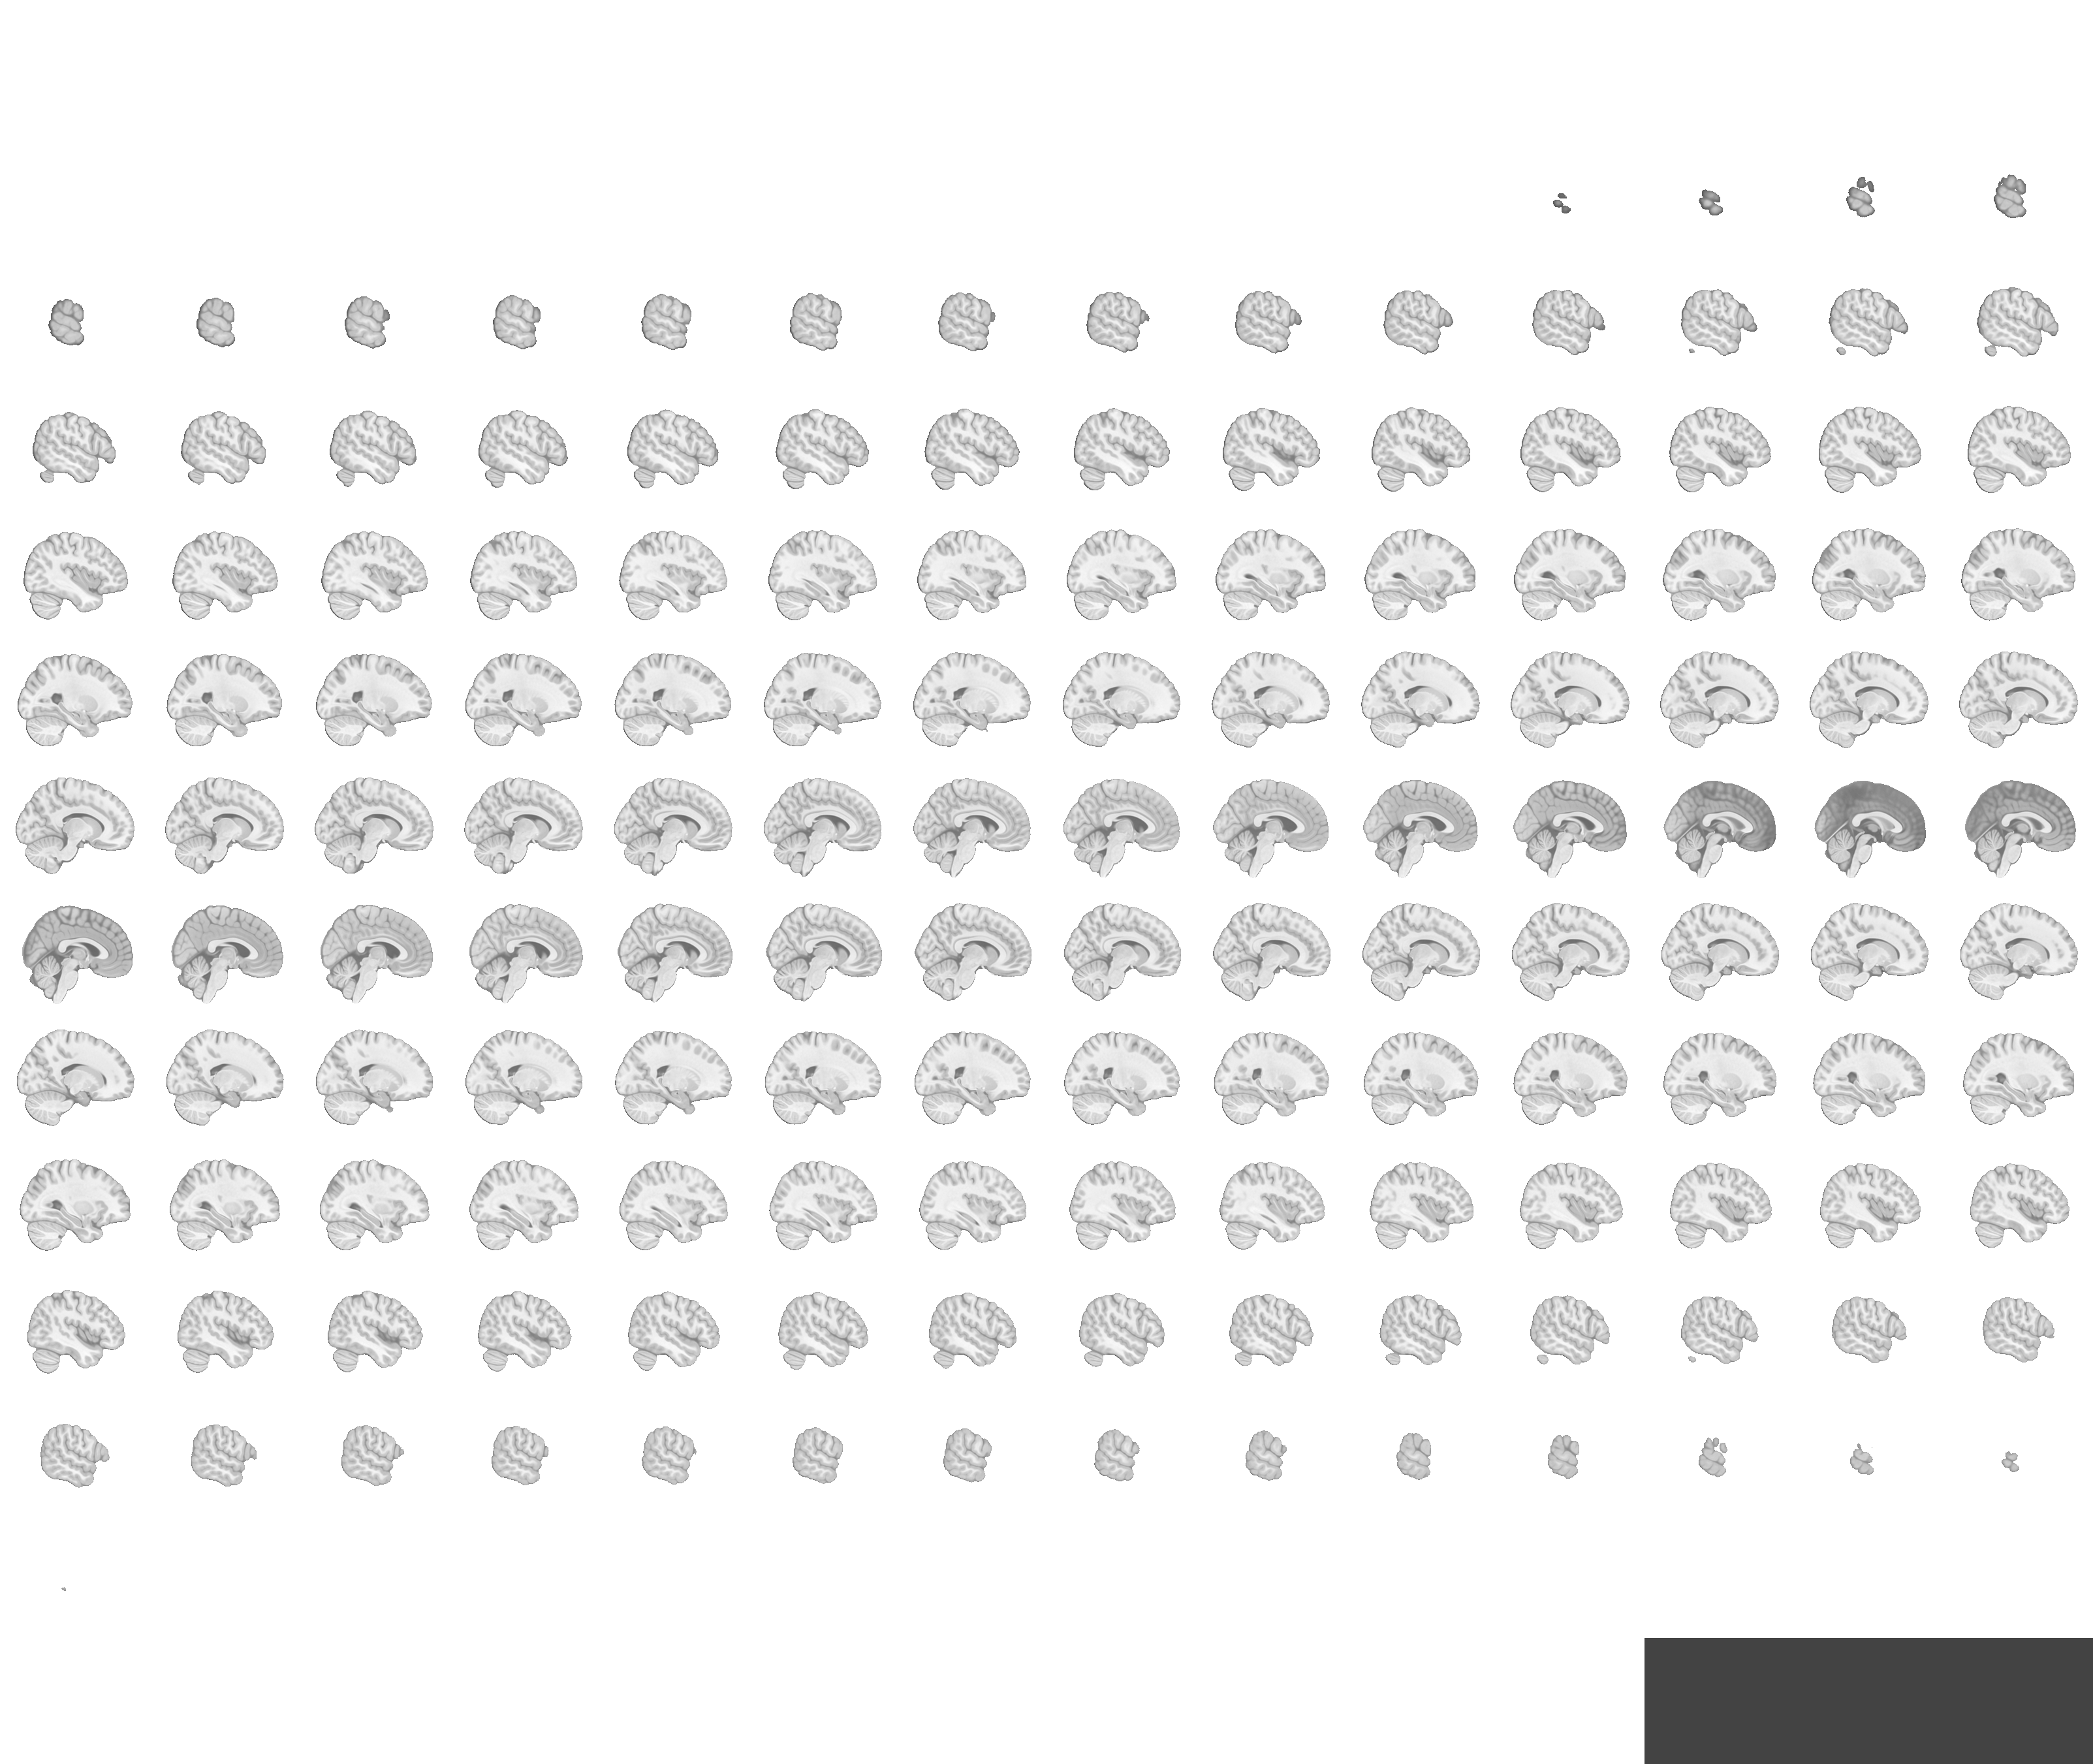
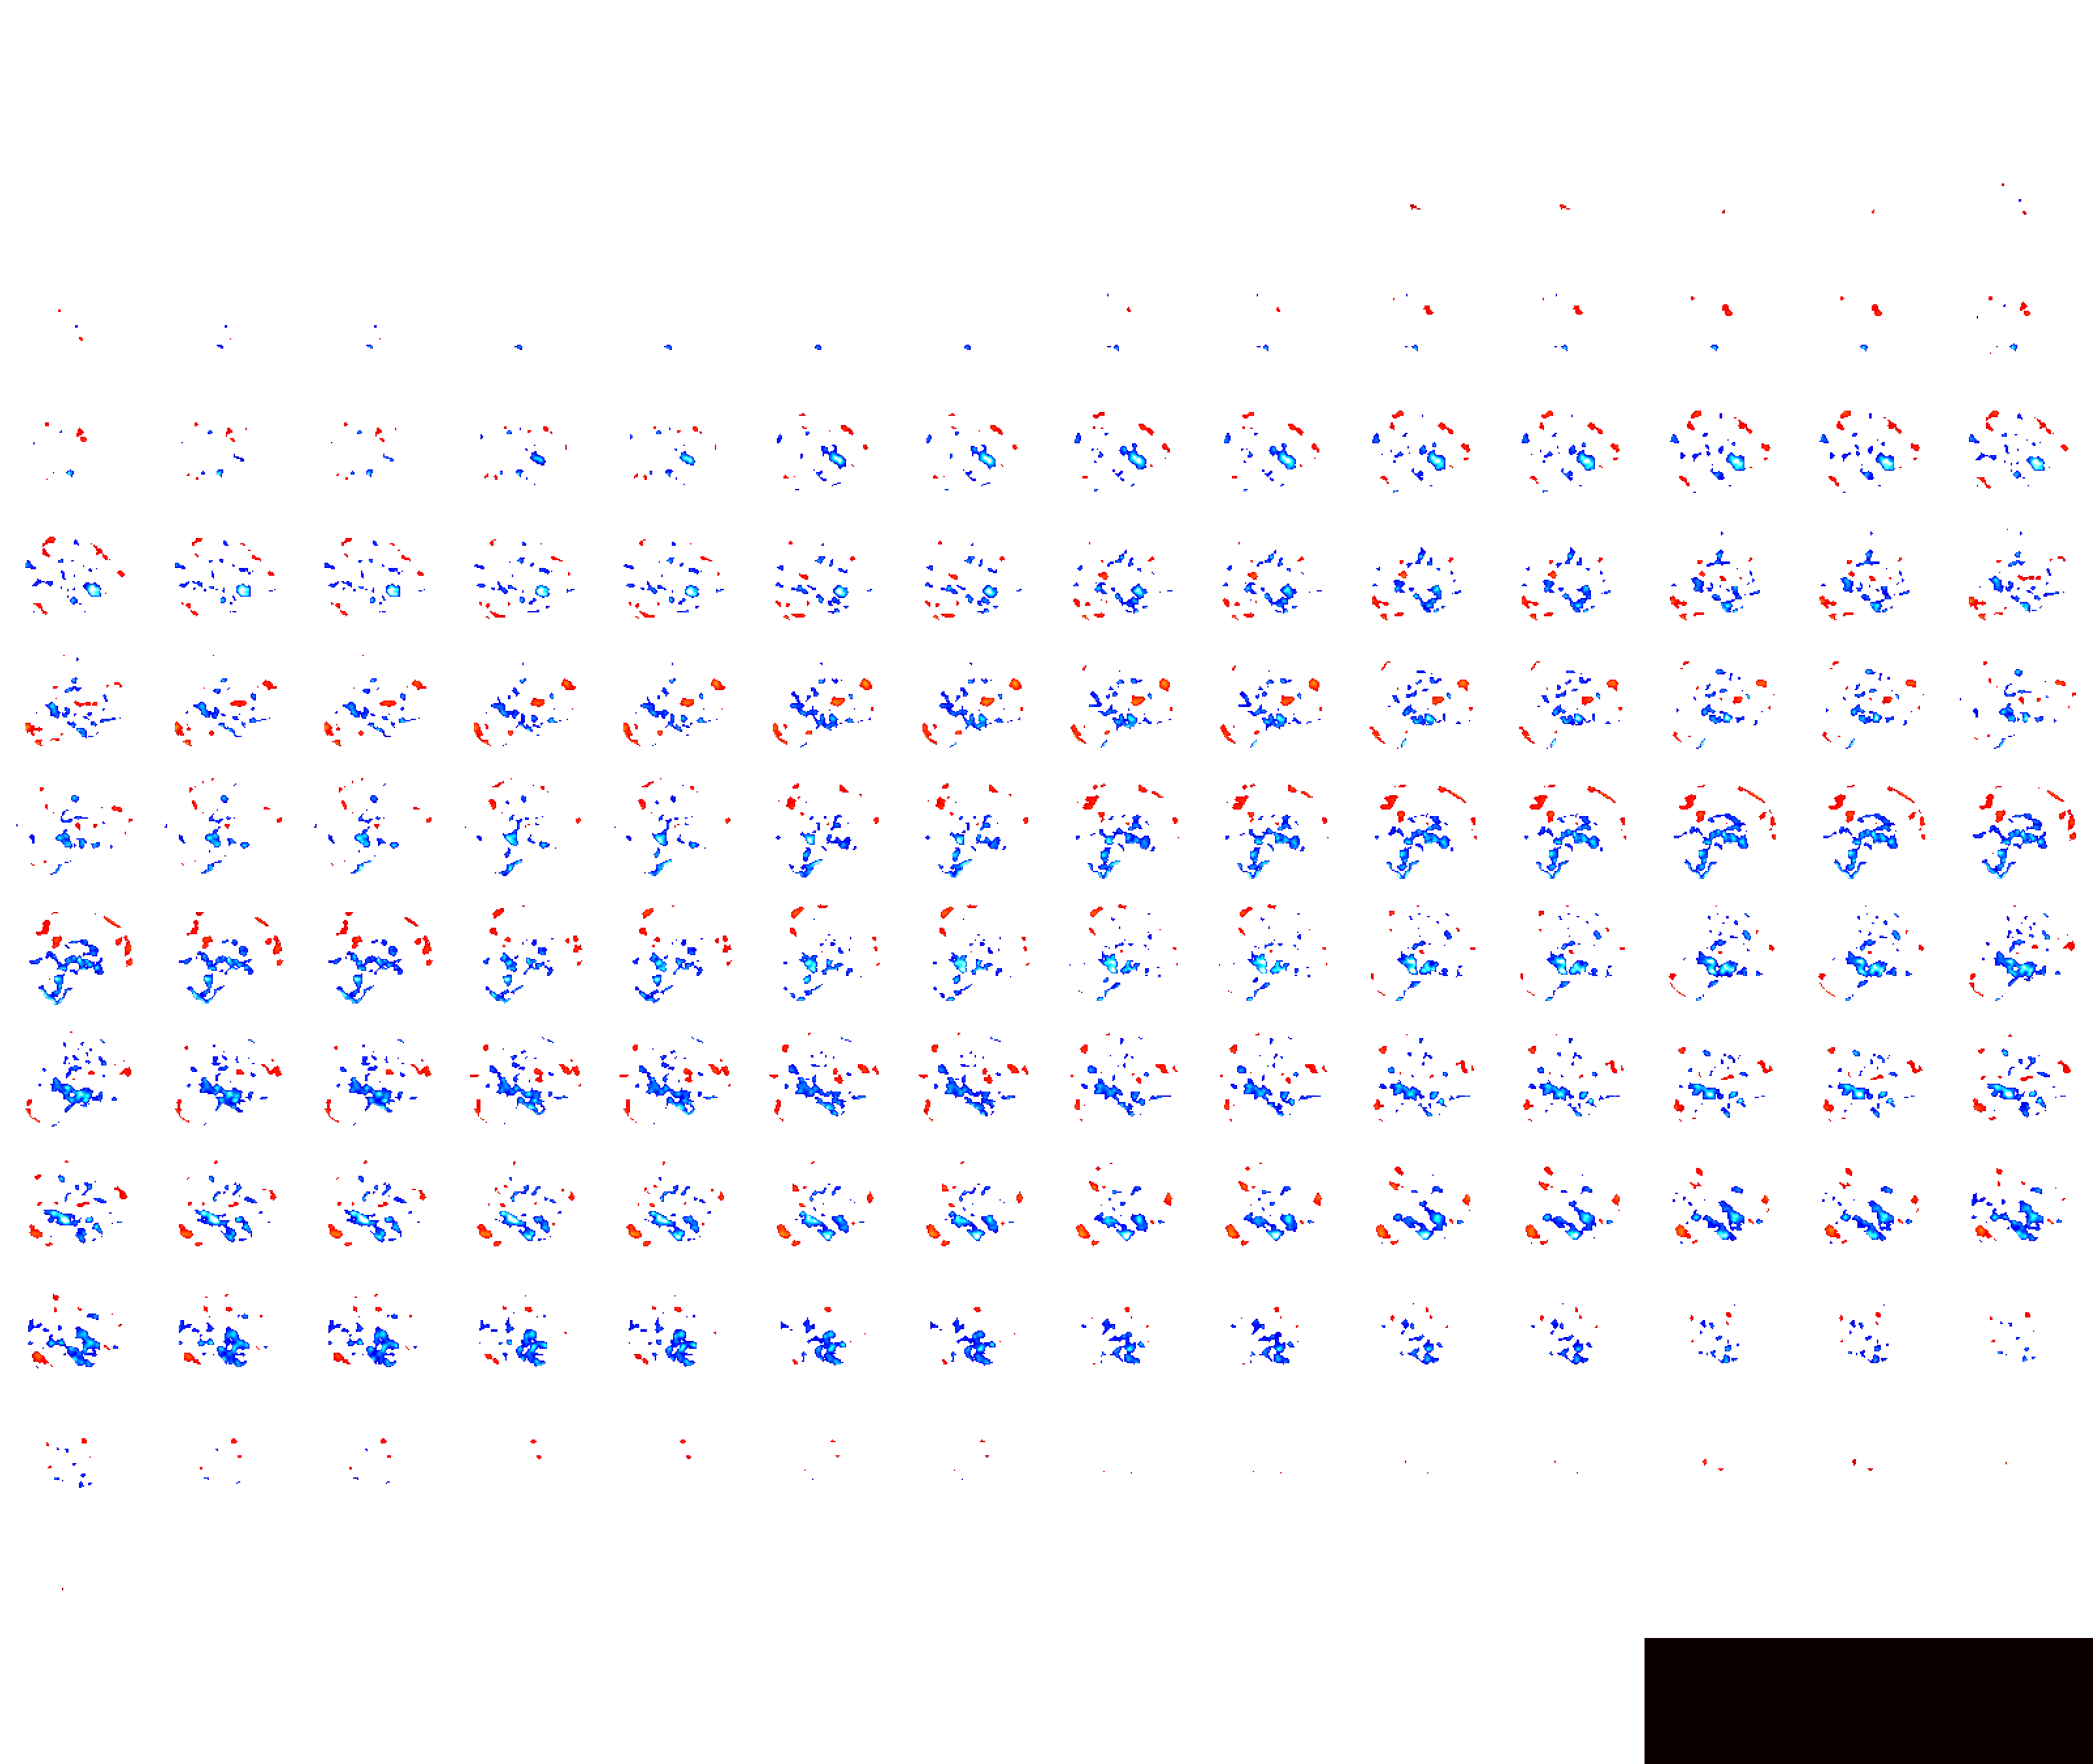

In [2]:
import pandas as pd
from nilearn.image import load_img,math_img,threshold_img
from nilearn import plotting

stat_map = load_img(r'/mnt/data/DCM/result_backup/2022.10.29/game1_v22_nofmap/separate_hexagon_2phases_correct_trials/Setall/group/all/2ndLevel/_contrast_id_ZF_0011/spmT_0001.nii')
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)

#stat_map = threshold_img(
#    stat_map,
#    threshold=2.3,
#    cluster_threshold=76)

plotting.view_img(stat_map_img=stat_map,bg_img=bg_img,threshold=2.3,vmax=7,symmetric_cbar=0,black_bg=None,)

# Covariates

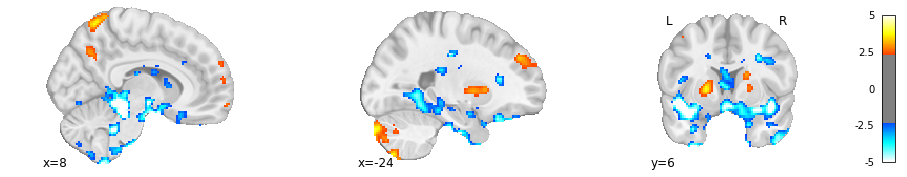

In [3]:
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img, math_img, threshold_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3,figsize=[16,3])
stat_map = load_img(r'/mnt/data/DCM/result_backup/2022.10.29/game1_v22_nofmap/separate_hexagon_2phases_correct_trials/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0011/spmT_0001.nii')
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)


stat_map = threshold_img(
    stat_map,
    threshold=2.3,
    cluster_threshold=60)


plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-24],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,axes=ax[2])
#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-10],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,#figure=fig,axes=ax[3])
plt.savefig(r"/mnt/workdir/DCM/result/game1/game1_covariate_acc_decision.svg",bbox_inches='tight',pad_inches=0,dpi=300)

In [4]:
from nilearn.glm import threshold_stats_img
from nilearn.image import load_img
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii')
#zmap = zscore_img(stat_map)
thresholded_map2, threshold2 = threshold_stats_img(stat_map, alpha=0.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

ValueError: File not found: '/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii'

In [ ]:
stat_map.get_fdata().max()

# Mean_zmap of two data set

In [ ]:
import pandas as pd
from nilearn.image import load_img,math_img
from nilearn.plotting import view_img

stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/acc/2ndLevel/_contrast_id_ZF_0006/spmT_0002.nii')
bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)", img=stat_map)
view_img(stat_map_img=stat_map,bg_img=bg_img,threshold=2.3,symmetric_cbar=0,black_bg=None)

In [ ]:
from nilearn.image import mean_img
zmaps = [r'D:\Project\Development cognitive map\Result\defROI\set1\hp\2ndLevel\_contrast_id_ZF_0011/ZT_0001.nii',
         r'D:\Project\Development cognitive map\Result\defROI\set2\hp\2ndLevel\_contrast_id_ZF_0011/ZT_0001.nii']
mean_zmap = mean_img(zmaps)
mean_zmap_path = r'D:\Project\Development cognitive map\Result\defROI/mean_zmap_3.nii.gz'
mean_zmap.to_filename(mean_zmap_path)

In [ ]:
import os
import numpy as np
from nilearn.image import load_img,math_img,new_img_like
from  nilearn.masking import apply_mask

def zscore_nii(source_dir,file,prefix):
    filepath = os.path.join(source_dir,file)
    mask = load_img(r'D:\Project\Common\Template\tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-02_desc-brain_mask.nii.gz')
    #mask = load_img(r'/mnt/data/Template/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii.gz')
    fmap = load_img(filepath)
    
    fmap_mean = apply_mask(fmap, mask).mean()
    fmap_std = apply_mask(fmap, mask).std()
    fmap_zscore = math_img("(img- {})/{}".format(fmap_mean,fmap_std),img=fmap)
    
    fmap_data = fmap_zscore.get_fdata()
    mask_data = mask.get_fdata()
    fmap_data[mask_data == 0] = np.float64('NaN')
    map_zscore = new_img_like(fmap_zscore, fmap_data)
    map_zscore.to_filename(os.path.join(source_dir,prefix+file[3:]))

zscore_nii(r'D:\Project\Development cognitive map\Result\defROI\set1\hp\2ndLevel\_contrast_id_ZF_0011','spmT_0001.nii','Z')